In [ ]:
import logging
import threading

import matplotlib.pyplot as plt
import numpy as np
import MDAnalysis as mda

from imdclient.tests.datafiles import NAMD_TOPOL

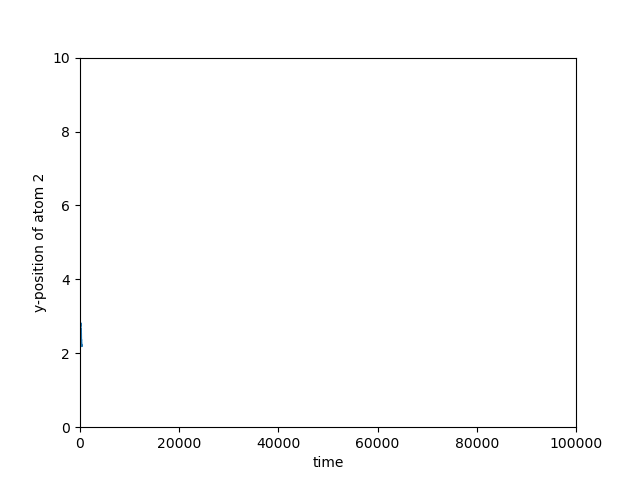

In [4]:
logger = logging.getLogger("imdclient.IMDClient")
file_handler = logging.FileHandler("imdclient.log")
formatter = logging.Formatter(
    "%(asctime)s - %(name)s - %(levelname)s - %(message)s"
)
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)
logger.setLevel(logging.INFO)

i = 0
u = mda.Universe(NAMD_TOPOL, "imd://localhost:1025")

# Enable widget for interactive plotting
%matplotlib widget

# Create the initial plot
plt.ion()
fig, ax = plt.subplots()
hl, = ax.plot([], [])  # Empty plot to update dynamically
ax.set_xlim(0, 100000)     # Set X limits
ax.set_ylim(0, 10)     # Set Y limits
ax.set_xlabel("time")
ax.set_ylabel("y-position of atom 2")
# display(fig)  # Display the plot in Jupyter

# Function to update the line dynamically
def update_line(new_x, new_y):
    hl.set_xdata(np.append(hl.get_xdata(), new_x))
    hl.set_ydata(np.append(hl.get_ydata(), new_y))
    # ax.set_xlim(0, max(hl.get_xdata()))  # Adjust X limits as data grows
    fig.canvas.draw_idle()  # Efficient redraw

def read_data_from_buffer():
    i = 0
    for ts in u.trajectory:
        # print(ts.positions[1][:2])
        i += 1
        
        # print(i, ts.positions[1][1])
        update_line(i, ts.positions[1][1])

    logger.info(f"Parsed {i} frames")

data_thread = threading.Thread(target=read_data_from_buffer)
data_thread.daemon = True  # Daemon thread exits when main program does
data_thread.start()